In [1]:
# 決定木

In [18]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
from sklearn.model_selection import train_test_split
import mglearn
import graphviz
%matplotlib inline

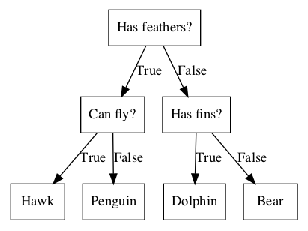

In [3]:
mglearn.plots.plot_animal_tree()

In [4]:
# 事前枝刈り

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(
    cancer.data , cancer.target , stratify=cancer.target , random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
display(tree.score(X_train,y_train))
display(tree.score(X_test,y_test))

1.0

0.9370629370629371

In [6]:
tree = DecisionTreeClassifier(max_depth=4 , random_state= 0)
tree.fit(X_train,y_train)

display(tree.score(X_train,y_train))
display(tree.score(X_test,y_test))

0.9882629107981221

0.951048951048951

In [7]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot",class_names=["malignant","benign"],feature_names=cancer.feature_names,impurity=False,filled=True)

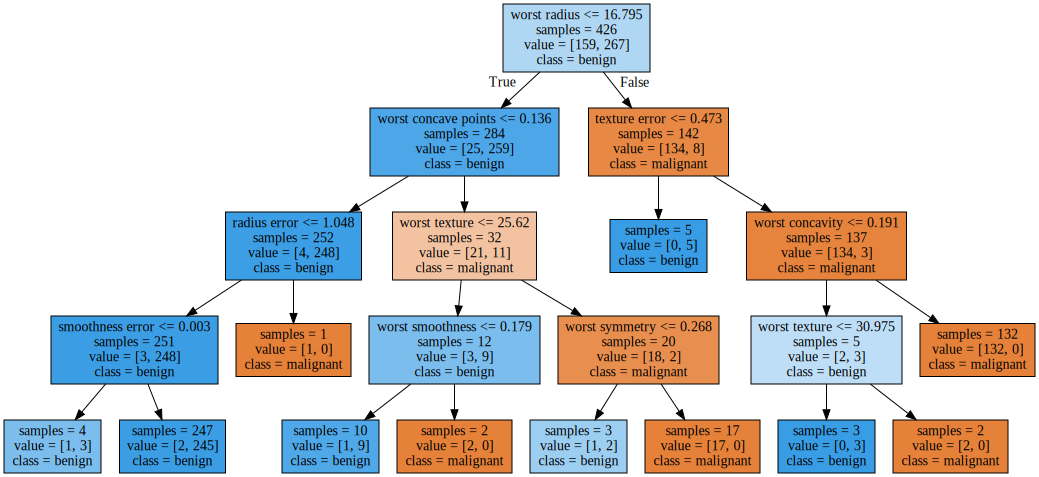

In [8]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [9]:
# 特徴量の重要度

In [10]:
print("Feature Importances:\n{}".format(tree.feature_importances_))

Feature Importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


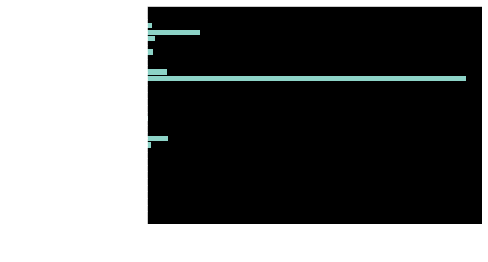

In [12]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_ , align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


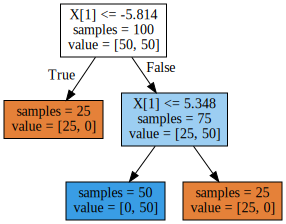

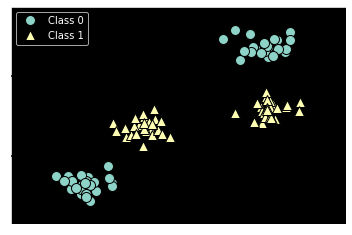

In [13]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)


Text(0, 0.5, 'Price in $/Mbyte')

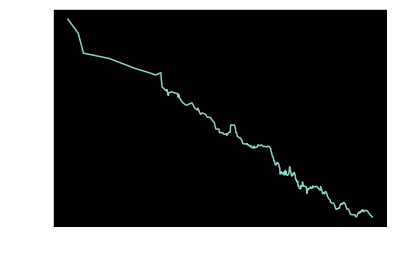

In [15]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))

plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

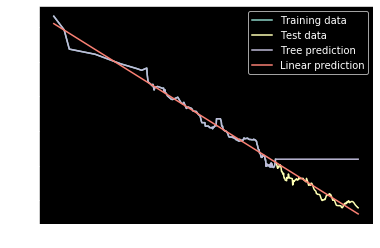

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:,np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train,y_train)


X_all = ram_prices.date[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price , label="Training data")
plt.semilogy(data_test.date, data_test.price , label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr , label="Linear prediction")
plt.legend()
